<a href="https://colab.research.google.com/github/isaacgrove/DS-Unit-1-Build/blob/master/IsaacGrove_Build_Week_1_IMDB_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
# title basics
title_url = 'https://datasets.imdbws.com/title.basics.tsv.gz'


# crew (directors & writers)
crew_url = 'https://datasets.imdbws.com/title.crew.tsv.gz'

# ratings
ratings_url = 'https://datasets.imdbws.com/title.ratings.tsv.gz'




# DON'T NEED
#
# principal actors
principals_url = 'https://datasets.imdbws.com/title.principals.tsv.gz'
# name basics
names_url = 'https://datasets.imdbws.com/name.basics.tsv.gz'
# title akas
akas_url = 'https://datasets.imdbws.com/title.akas.tsv.gz'
# title episode
episode_url = 'https://datasets.imdbws.com/title.episode.tsv.gz'
#

In [3]:
# Next few cells simply lay out individual dataframes

df_ratings = pd.read_csv(ratings_url,compression='gzip',sep='\t')
print(df_ratings.shape)
df_ratings.head()

(1022151, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.6,1584
1,tt0000002,6.1,189
2,tt0000003,6.5,1244
3,tt0000004,6.2,117
4,tt0000005,6.1,1989


In [4]:
df_crew = pd.read_csv(crew_url,compression='gzip',sep='\t')
print(df_crew.shape)
df_crew.head()


(6524093, 3)


,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [5]:
# Main df we're starting with. 

df_title = pd.read_csv(title_url,compression='gzip',sep='\t')
print(df_title.shape)
df_title.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(6524093, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
df_title['titleType'].value_counts()

tvEpisode       4611897
short            722868
movie            542754
video            253734
tvSeries         178347
tvMovie          120829
tvMiniSeries      29343
tvSpecial         27472
videoGame         24974
tvShort           11875
Name: titleType, dtype: int64

In [7]:
# Only use movies
# 500k rows instead of 6.5 million

df_movies = df_title[df_title['titleType']=='movie']
print(df_movies.shape)
df_movies.head()

(542754, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


In [8]:
# Exclude adult films

df_movies = df_movies[df_movies['isAdult']==0]
print(df_movies.shape)
df_movies.head()

(534057, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


In [9]:
# Drop unnecessary columns

df_movies = df_movies.drop(['originalTitle', 'isAdult', 'endYear'], axis=1)

df_movies.head()

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,1894,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,1900,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,1905,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama"


In [10]:
# Turn startYear column into numbers. First see that it is an object.

df_movies.dtypes

tconst            object
titleType         object
primaryTitle      object
startYear         object
runtimeMinutes    object
genres            object
dtype: object

In [11]:
# Still an object after replacing NaNs

import numpy as np
df_movies = df_movies.replace({'\\N': np.NaN})

df_movies.dtypes

tconst            object
titleType         object
primaryTitle      object
startYear         object
runtimeMinutes    object
genres            object
dtype: object

In [12]:
# All the years look like integers but aren't

pd.set_option('display.max_rows', 222)

df_movies['startYear'].value_counts()

2017    18014
2016    17603
2018    17414
2015    16520
2014    15879
2019    15457
2013    14867
2012    14048
2011    13040
2010    12011
2009    11178
2008     9532
2007     8191
2006     7549
2005     7032
2020     6977
2004     6191
2003     5543
2002     5470
2001     5244
2000     4896
1999     4716
1998     4535
1997     4376
1990     4215
1995     4135
1996     4129
1991     4121
1988     4120
1992     4084
1989     4061
1987     3973
1993     3947
1994     3932
1986     3889
1985     3872
1984     3854
1983     3779
1979     3738
1980     3711
1982     3691
1981     3671
1972     3652
1978     3576
1973     3573
1975     3562
1974     3509
1971     3502
1976     3486
1977     3467
1970     2952
1969     2754
1968     2665
1965     2323
1967     2312
1966     2282
1964     2050
1963     1867
1920     1859
1962     1832
1961     1827
1921     1799
1960     1795
1959     1651
1919     1608
1958     1538
1922     1425
1918     1423
1957     1423
1956     1380
1916     1316
1917  

In [13]:
# Check nulls first

df_movies['startYear'].isnull().sum()

61834

In [14]:
# Drop nulls over the whole dataframe...

df_movies = df_movies.dropna()
print(df_movies.shape)

(309736, 6)


In [15]:
# The nulls are gone.

df_movies['startYear'].isnull().sum()

0

In [0]:
# Create new column with numeric-type years

new_column = pd.to_numeric(df_movies['startYear'])

In [0]:
df_movies['year'] = new_column

In [18]:
df_movies.head()

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,year
8,tt0000009,movie,Miss Jerry,1894,45,Romance,1894
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",1897
571,tt0000574,movie,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",1906
673,tt0000679,movie,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",1908
1173,tt0001184,movie,Don Juan de Serrallonga,1910,58,"Adventure,Drama",1910


In [19]:
# Good to go

df_movies.dtypes

tconst            object
titleType         object
primaryTitle      object
startYear         object
runtimeMinutes    object
genres            object
year               int64
dtype: object

In [20]:
# Merge directors onto df

movies_and_directors = pd.merge(df_movies, 
                               df_crew, 
                               on='tconst', 
                               how='inner')
movies_and_directors.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,year,directors,writers
0,tt0000009,movie,Miss Jerry,1894,45,Romance,1894,nm0085156,nm0085156
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",1897,nm0714557,\N
2,tt0000574,movie,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",1906,nm0846879,nm0846879
3,tt0000679,movie,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",1908,"nm0091767,nm0877783","nm0000875,nm0877783"
4,tt0001184,movie,Don Juan de Serrallonga,1910,58,"Adventure,Drama",1910,"nm0063413,nm0550220",nm0049370
5,tt0001258,movie,The White Slave Trade,1910,45,Drama,1910,nm0088881,\N
6,tt0001285,movie,The Life of Moses,1909,50,"Biography,Drama,Family",1909,nm0085865,\N
7,tt0001498,movie,The Battle of Trafalgar,1911,51,War,1911,nm0205986,\N
8,tt0001790,movie,"Les Misérables, Part 1: Jean Valjean",1913,60,Drama,1913,nm0135052,"nm0135053,nm0401076"
9,tt0001812,movie,Oedipus Rex,1911,56,Drama,1911,nm0294276,nm0814668


In [21]:
# Merge ratings on as well

movies_directors_and_ratings = pd.merge(movies_and_directors, 
                               df_ratings, 
                               on='tconst', 
                               how='inner')
movies_directors_and_ratings.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,year,directors,writers,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,1894,45,Romance,1894,nm0085156,nm0085156,5.4,86
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",1897,nm0714557,\N,5.2,325
2,tt0000574,movie,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",1906,nm0846879,nm0846879,6.1,555
3,tt0000679,movie,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",1908,"nm0091767,nm0877783","nm0000875,nm0877783",4.8,33
4,tt0001184,movie,Don Juan de Serrallonga,1910,58,"Adventure,Drama",1910,"nm0063413,nm0550220",nm0049370,3.1,11
5,tt0001258,movie,The White Slave Trade,1910,45,Drama,1910,nm0088881,\N,5.8,76
6,tt0001285,movie,The Life of Moses,1909,50,"Biography,Drama,Family",1909,nm0085865,\N,5.1,30
7,tt0001790,movie,"Les Misérables, Part 1: Jean Valjean",1913,60,Drama,1913,nm0135052,"nm0135053,nm0401076",5.8,21
8,tt0001812,movie,Oedipus Rex,1911,56,Drama,1911,nm0294276,nm0814668,5.8,6
9,tt0001892,movie,Den sorte drøm,1911,53,Drama,1911,nm0300487,"nm0300487,nm2131092",5.9,178


In [22]:
# This df is our starting point.
# 
# So right now we have all movies with their directors and average IMDB ratings

movies_directors_and_ratings.shape

(208413, 11)

In [23]:
df_movies_1940s = movies_directors_and_ratings[(movies_directors_and_ratings['year'] >= 1940) & (movies_directors_and_ratings['year'] <= 1949)]
print(df_movies_1940s.shape)

(7710, 11)


In [24]:
df_movies_1950s = movies_directors_and_ratings[(movies_directors_and_ratings['year'] >= 1950) & (movies_directors_and_ratings['year'] <= 1959)]
print(df_movies_1950s.shape)

(10543, 11)


In [25]:
df_movies_1960s = movies_directors_and_ratings[(movies_directors_and_ratings['year'] >= 1960) & (movies_directors_and_ratings['year'] <= 1969)]
print(df_movies_1960s.shape)

(13483, 11)


In [26]:
df_movies_1970s = movies_directors_and_ratings[(movies_directors_and_ratings['year'] >= 1970) & (movies_directors_and_ratings['year'] <= 1979)]

print(df_movies_1970s.shape)

(16147, 11)


In [27]:
df_movies_1980s = movies_directors_and_ratings[(movies_directors_and_ratings['year'] >= 1980) & (movies_directors_and_ratings['year'] <= 1989)]
print(df_movies_1980s.shape)

(17452, 11)


In [28]:
df_movies_1990s = movies_directors_and_ratings[(movies_directors_and_ratings['year'] >= 1990) & (movies_directors_and_ratings['year'] <= 1999)]
print(df_movies_1990s.shape)

(19691, 11)


In [0]:
df_movies_2000s = movies_directors_and_ratings[(movies_directors_and_ratings['year'] >= 2000) & (movies_directors_and_ratings['year'] <= 2009)]

In [30]:
df_movies_2010s = movies_directors_and_ratings[(movies_directors_and_ratings['year'] >= 2010) & (movies_directors_and_ratings['year'] <= 2019)]

print(df_movies_2010s.shape)

(72947, 11)


In [31]:
print(df_movies_2000s.shape)

(39013, 11)


In [0]:
mean40 = df_movies_1940s['averageRating'].mean()

In [0]:
mean50 = df_movies_1950s['averageRating'].mean()

In [0]:
mean60 = df_movies_1960s['averageRating'].mean()

In [0]:
mean70 = df_movies_1970s['averageRating'].mean()

In [0]:
mean80 = df_movies_1980s['averageRating'].mean()

In [0]:
mean90 = df_movies_1990s['averageRating'].mean()

In [0]:
mean00 = df_movies_2000s['averageRating'].mean()

In [0]:
mean10 = df_movies_2010s['averageRating'].mean()

In [40]:
horror_70s = df_movies_1970s[df_movies_1970s['genres'] == 'Horror']
print(horror_70s.shape)
horror_70s.head()

(355, 11)


,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,year,directors,writers,averageRating,numVotes
24197,tt0054724,movie,I Eat Your Skin,1971,92,Horror,1971,nm0855096,nm0855096,3.4,1170
30118,tt0063608,movie,Sinthia: The Devil's Doll,1970,78,Horror,1970,nm0824306,"nm0732299,nm0824306",3.6,191
30944,tt0064902,movie,The Blood Rose,1970,92,Horror,1970,nm0612474,"nm0612474,nm0140342,nm0649180",6.0,296
31119,tt0065168,movie,The Nude Vampire,1970,90,Horror,1970,nm0210811,"nm0210811,nm0594959",5.5,1164
31276,tt0065478,movie,Blood Mania,1970,81,Horror,1970,nm0642057,"nm0139433,nm0187176,nm0755105",4.0,820


In [41]:
horror_70s['averageRating'].mean()

5.088169014084505

In [42]:
comedy_70s = df_movies_1970s[df_movies_1970s['genres'] == 'Comedy']
print(comedy_70s.shape)
comedy_70s.head()

(2054, 11)


,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,year,directors,writers,averageRating,numVotes
8901,tt0031458,movie,El huésped del sevillano,1970,86,Comedy,1970,nm0649563,"nm0524001,nm0720019,nm0848519",7.1,8
29549,tt0062784,movie,El certificado,1970,102,Comedy,1970,nm0516202,nm0516202,6.0,20
29929,tt0063334,movie,Nahtche V'Hageneral,1972,105,Comedy,1972,nm0643136,nm0851780,5.9,7
30157,tt0063666,movie,"Love, Emilia",1970,74,Comedy,1970,nm0845223,"nm0845223,nm0879476",6.9,53
30207,tt0063751,movie,The Howl,1970,93,Comedy,1970,nm0000972,"nm0000972,nm0299295,nm0519418,nm0698541",5.5,323


In [43]:
comedy_70s = df_movies_1970s[df_movies_1970s['genres'] == 'Comedy']
print(comedy_70s.shape)
comedy_70s.head()

(2054, 11)


,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,year,directors,writers,averageRating,numVotes
8901,tt0031458,movie,El huésped del sevillano,1970,86,Comedy,1970,nm0649563,"nm0524001,nm0720019,nm0848519",7.1,8
29549,tt0062784,movie,El certificado,1970,102,Comedy,1970,nm0516202,nm0516202,6.0,20
29929,tt0063334,movie,Nahtche V'Hageneral,1972,105,Comedy,1972,nm0643136,nm0851780,5.9,7
30157,tt0063666,movie,"Love, Emilia",1970,74,Comedy,1970,nm0845223,"nm0845223,nm0879476",6.9,53
30207,tt0063751,movie,The Howl,1970,93,Comedy,1970,nm0000972,"nm0000972,nm0299295,nm0519418,nm0698541",5.5,323


In [44]:
comedy_70s['averageRating'].mean()

5.48768257059395

In [45]:
# I just want the top 10 single genres. No combos.

df_movies_2010s['genres'].value_counts().nlargest(40)

Drama                            11298
Documentary                      10548
Comedy                            5092
Comedy,Drama                      2704
Horror                            2484
Drama,Romance                     1600
Thriller                          1443
Comedy,Drama,Romance              1250
Comedy,Romance                    1230
Drama,Thriller                    1036
Horror,Thriller                   1011
Action                             788
Biography,Documentary              772
Documentary,Drama                  611
Romance                            604
Documentary,Music                  602
Action,Crime,Drama                 586
Comedy,Horror                      561
Crime,Drama,Thriller               540
Crime,Drama                        522
Biography,Documentary,History      508
Drama,Family                       494
Documentary,History                492
Family                             473
Horror,Mystery,Thriller            414
Action,Drama             

In [46]:
# Means for the top 10 genres for 1970s, 2010s

# Documentaries 6.9 and 7.2 ---- Horror 5.0 and 4.6
# The extremes got more extreme


genre_list = ['Drama', 'Documentary', 'Comedy', 
              'Horror', 'Thriller', 'Action',
              'Romance', 'Family', 'Animation', 'Sci-Fi']

def get_genre_means_1970s(list):
  for genre in list:
    df = df_movies_1970s[df_movies_1970s['genres'] == genre]
    print('The average rating for ' + str(genre) + " movies in the 1970s is: " + str(df['averageRating'].mean()))

get_genre_means_1970s(genre_list)

The average rating for Drama movies in the 1970s is: 6.33316923076923
The average rating for Documentary movies in the 1970s is: 6.92979797979798
The average rating for Comedy movies in the 1970s is: 5.48768257059395
The average rating for Horror movies in the 1970s is: 5.088169014084505
The average rating for Thriller movies in the 1970s is: 5.555118110236221
The average rating for Action movies in the 1970s is: 5.758232931726908
The average rating for Romance movies in the 1970s is: 6.204098360655736
The average rating for Family movies in the 1970s is: 6.41276595744681
The average rating for Animation movies in the 1970s is: 6.531818181818182
The average rating for Sci-Fi movies in the 1970s is: 5.2025


In [47]:
ordered_genres_1970s = ['Horror', 'Sci-Fi', 'Comedy', 
                        'Thriller', 'Action', 'Romance', 
                        'Drama', 'Family', 'Animation', 'Documentary']

df_movies_1970s.averageRating.mean()

6.053762308788022

In [48]:
def get_genre_means_2010s(list):
  for genre in list:
    df = df_movies_2010s[df_movies_2010s['genres'] == genre]
    print('The average rating for ' + str(genre) + " movies in the 2010s is: " + str(df['averageRating'].mean()))

get_genre_means_2010s(genre_list)

The average rating for Drama movies in the 2010s is: 6.430173482032175
The average rating for Documentary movies in the 2010s is: 7.2236063708759914
The average rating for Comedy movies in the 2010s is: 5.707835820895516
The average rating for Horror movies in the 2010s is: 4.630958132045085
The average rating for Thriller movies in the 2010s is: 5.4932778932778925
The average rating for Action movies in the 2010s is: 5.593527918781728
The average rating for Romance movies in the 2010s is: 5.963576158940398
The average rating for Family movies in the 2010s is: 5.9270613107822445
The average rating for Animation movies in the 2010s is: 5.964024390243901
The average rating for Sci-Fi movies in the 2010s is: 5.095752895752895


In [49]:
movies_directors_and_ratings['directors'].value_counts().nlargest(21)

\N           1044
nm0627864     193
nm0064415     134
nm0001238     132
nm0782947     131
nm0484645     125
nm0437356     112
nm0385171     111
nm0000406     110
nm0861703     107
nm0781261     106
nm0002031     103
nm0792450     102
nm0554924      98
nm0567757      97
nm0136025      94
nm0005847      92
nm0217035      92
nm0853028      88
nm0245385      87
nm0045800      85
Name: directors, dtype: int64

In [50]:
# I'm gonna take the top n most prolific directors and see if their mean is any better
# than everyone else's means (t-test)
# Since I'm only working with a few, I can go get their names easily later.



# Make a list of top 20 directors


top20_directors = movies_directors_and_ratings['directors'].value_counts().nlargest(21)

director_list = []

for value in top20_directors.keys():
  director_list.append(value)

print(director_list)
del director_list[0]
print(director_list)

['\\N', 'nm0627864', 'nm0064415', 'nm0001238', 'nm0782947', 'nm0484645', 'nm0437356', 'nm0385171', 'nm0000406', 'nm0861703', 'nm0781261', 'nm0002031', 'nm0792450', 'nm0554924', 'nm0567757', 'nm0136025', 'nm0005847', 'nm0217035', 'nm0853028', 'nm0245385', 'nm0045800']
['nm0627864', 'nm0064415', 'nm0001238', 'nm0782947', 'nm0484645', 'nm0437356', 'nm0385171', 'nm0000406', 'nm0861703', 'nm0781261', 'nm0002031', 'nm0792450', 'nm0554924', 'nm0567757', 'nm0136025', 'nm0005847', 'nm0217035', 'nm0853028', 'nm0245385', 'nm0045800']


In [51]:
directors_condition = ((movies_directors_and_ratings['directors'] == director_list[0]) | 
                      #  (movies_directors_and_ratings['directors'] == director_list[1]) |
                      #  (movies_directors_and_ratings['directors'] == director_list[2]) |
                      #  (movies_directors_and_ratings['directors'] == director_list[3]) |
                      #  (movies_directors_and_ratings['directors'] == director_list[4]) |
                      #  (movies_directors_and_ratings['directors'] == director_list[5]) |
                       (movies_directors_and_ratings['directors'] == director_list[6]) |
                       (movies_directors_and_ratings['directors'] == director_list[7]) |
                       (movies_directors_and_ratings['directors'] == director_list[8]) |
                       (movies_directors_and_ratings['directors'] == director_list[9]) |
                       (movies_directors_and_ratings['directors'] == director_list[10]) |
                       (movies_directors_and_ratings['directors'] == director_list[11]) |
                       (movies_directors_and_ratings['directors'] == director_list[12]) |
                       (movies_directors_and_ratings['directors'] == director_list[13]) |
                       (movies_directors_and_ratings['directors'] == director_list[14]) |
                       (movies_directors_and_ratings['directors'] == director_list[15]) |
                       (movies_directors_and_ratings['directors'] == director_list[16]) |
                       (movies_directors_and_ratings['directors'] == director_list[17]) |
                       (movies_directors_and_ratings['directors'] == director_list[18]) |
                       (movies_directors_and_ratings['directors'] == director_list[19]))
top_directors_only = movies_directors_and_ratings[directors_condition]

print(top_directors_only.shape)
top_directors_only.head()

(1565, 11)


,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,year,directors,writers,averageRating,numVotes
104,tt0004712,movie,The Undesirable,1915,67,Drama,1915,nm0002031,"nm0417905,nm0869321",6.3,157
131,tt0005179,movie,David Harum,1915,50,"Comedy,Drama,Romance",1915,nm0245385,"nm0245385,nm0921684",5.6,21
204,tt0006426,movie,Betty of Greystone,1916,50,Drama,1916,nm0245385,nm0682756,5.2,12
227,tt0006679,movie,Fifty-Fifty,1916,55,Drama,1916,nm0245385,"nm0245385,nm0794340",4.9,9
231,tt0006736,movie,The Good Bad-Man,1916,50,"Romance,Western",1916,nm0245385,nm0001196,6.6,136


In [52]:
top_directors_only['directors'].value_counts()

nm0627864    193
nm0385171    111
nm0000406    110
nm0861703    107
nm0781261    106
nm0002031    103
nm0792450    102
nm0554924     98
nm0567757     97
nm0136025     94
nm0217035     92
nm0005847     92
nm0853028     88
nm0245385     87
nm0045800     85
Name: directors, dtype: int64

In [0]:
# Extra variables

top_directors_mean = top_directors_only['averageRating'].mean()
top_directors_std = top_directors_only['averageRating'].std()
all_directors_mean = movies_directors_and_ratings['averageRating'].mean()
all_directors_std = movies_directors_and_ratings['averageRating'].std()
x_labels = ['Top 20', 'Everyone else']
x_pos = np.arange(len(x_labels))
ratings = [top_directors_mean, all_directors_mean]
error = [top_directors_std, all_directors_std]


In [0]:
# Set up error bars for Visualization 2

import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # Numpy by default calculates the "population" std_dev
  # The following line is wrong:
  # s = np.std(data) 
  # But we want the "sample" std_dev
  s = np.std(data, ddof=1) # will use n-1 in the denominator
  # And will actually calculate the sample standard deviation
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (margin_of_error)

shwifty = confidence_interval(top_directors_only['averageRating'], confidence=0.95)

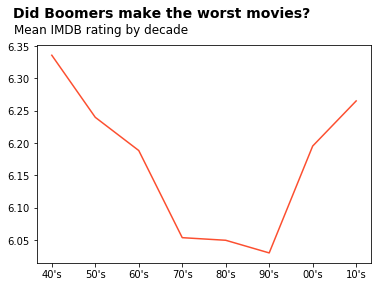

In [55]:
# VISUALIZATION 1: Did Boomers make the worst movies?

mean_data = pd.Series([mean40, mean50, mean60, mean70, mean80, mean90, mean00, mean10], 
                 index=["40's", "50's", "60's", "70's", "80's", "90's", "00's", "10's"])

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots()

# Data
ax.plot(mean_data, color='C1');

# Styling
plt.style.use('fivethirtyeight')
fig.patch.set(facecolor='white')
ax.set(facecolor='white')

# Title
ax.set_title("Did Boomers make the worst movies?", loc='left', 
             color='black', fontsize='14', fontweight='bold', x=-0.07, y=1.1)

# Subtitle
ax.text(s='Mean IMDB rating by decade', 
        x=-0.87, y=6.37, color='black', fontsize='12')

# y ticks
#ax.set_yticks(ticks=[5.5, 6, 6.5])

# y tick labels
#ax.set_yticklabels(labels=[' ', '6.1', ' ', '6.2', ' ', '6.3', ' ', '6.4'])
#                   color='gray', rotation='horizontal', fontsize='11')

# Remove vertical lines
ax.xaxis.grid(False)

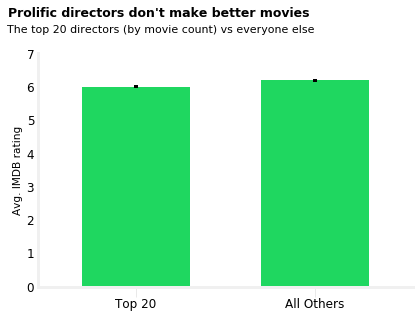

In [56]:
# VISUALIZATION 2 - Top 20 most prolific directors vs everyone else


fake = pd.Series([top_directors_mean, all_directors_mean])

#Set Stylesheet
plt.style.use('fivethirtyeight')

# figure / axes syntax
fig, ax = plt.subplots()

# for item in [fig, ax]:
#     item.patch.set_visible(False)

# plot the bars
fake.plot.bar(fake, yerr=shwifty, width=0.6, color='#1FD760');

# title
ax.set_title("Prolific directors don't make better movies", loc='left', 
             color='black', fontsize='12.5', fontweight='semibold', x=-0.08, y=1.13)

# subtitle
ax.text(s='The top 20 directors (by movie count) vs everyone else', 
        x=-0.72, y=7.63, color='black', fontsize='11')


# x label
# ax.set_xlabel('Rating     ', color='black', fontsize='11', 
#               fontweight='normal')

# y label
ax.set_ylabel('Avg. IMDB rating', color='black', 
              fontsize='10.5', fontweight='normal')

# x tick labels
ax.set_xticklabels(labels=['Top 20', 'All Others'], 
                   color='black', rotation='horizontal', fontsize='12', y=0.01)
# y tick labels
ax.set_yticklabels(labels=['0', '1', '2', '3', '4', '5', '6', '7'], 
                   color='black', rotation='horizontal', fontsize='12')
ax.grid(False)

# set y ticks
ax.set_yticks(ticks=range(0,8))

# set figure background color
fig.set_facecolor(color='white')
# fig.patch.set(facecolor='white')

# set axes background color
ax.set_facecolor(color='white')

# ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# extend x ticks
ax.tick_params(which='major', length=10, color='#E4E4E4', axis='x')


In [57]:
# Next 3 cells are setting up for visualization 3

genre_means_1970 = []

def list_genre_means_1970s(list):
  for genre in list:
    df = df_movies_1970s[df_movies_1970s['genres'] == genre]
    genre_means_1970.append(df['averageRating'].mean())

list_genre_means_1970s(genre_list)
print(genre_means_1970)

[6.33316923076923, 6.92979797979798, 5.48768257059395, 5.088169014084505, 5.555118110236221, 5.758232931726908, 6.204098360655736, 6.41276595744681, 6.531818181818182, 5.2025]


In [58]:
genre_means_2010s = []

def list_genre_means_2010s(list):
  for genre in list:
    df = df_movies_2010s[df_movies_2010s['genres'] == genre]
    genre_means_2010s.append(df['averageRating'].mean())

list_genre_means_2010s(genre_list)
print(genre_means_2010s)

[6.430173482032175, 7.2236063708759914, 5.707835820895516, 4.630958132045085, 5.4932778932778925, 5.593527918781728, 5.963576158940398, 5.9270613107822445, 5.964024390243901, 5.095752895752895]


In [59]:
ordered_genres_2010s = ['Horror', 'Sci-Fi', 
                        'Thriller', 'Action', 'Comedy', 'Animation', 
                        'Family', 'Romance', 'Drama', 'Documentary']

print(df_movies_1970s.averageRating.mean())
print(df_movies_2010s.averageRating.mean())

6.053762308788022
6.2652281793631195


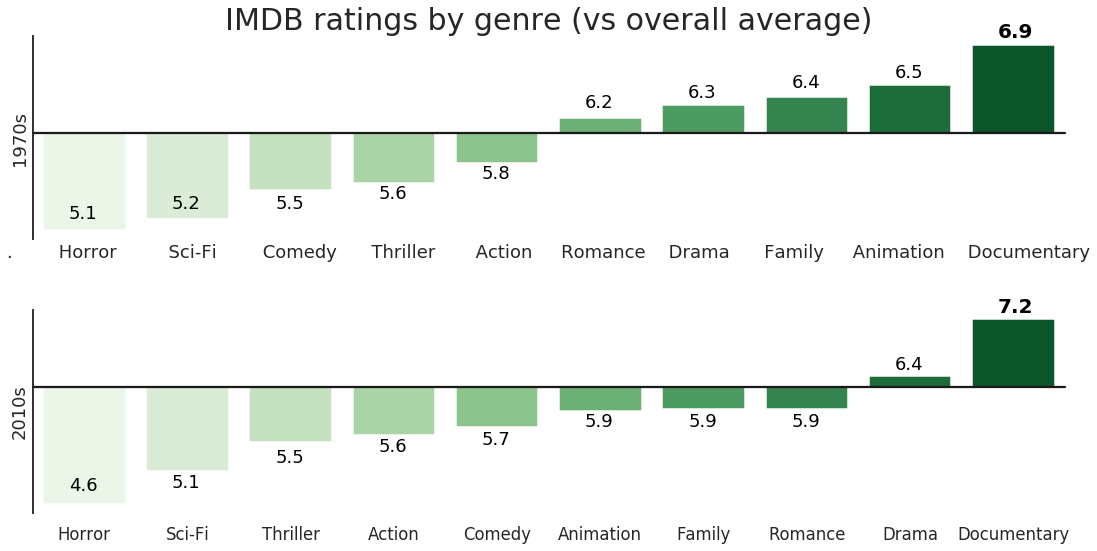

In [60]:
# Visualization 3: means by genre

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")


# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
#show_values_on_bars(ax)

# Title
ax1.set_title("IMDB ratings by genre (vs overall average)",fontsize=30)

genre_means_1970.sort()
# Top plot
x = np.array(ordered_genres_2010s)
y1 = np.array(genre_means_1970) - np.array(df_movies_1970s.averageRating.mean())
sns.barplot(x=x, y=y1, palette="Greens", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("1970s")
ax1.set_xlabel(".        Horror         Sci-Fi        Comedy      Thriller       Action     Romance    Drama      Family     Animation    Documentary")
ax1.text(s='6.9', x=8.85, y=0.95, fontsize='20', color='black', fontweight='bold')
ax1.text(s='6.5', x=7.85, y=0.55, fontsize='18', color='black')
ax1.text(s='6.4', x=6.85, y=0.45, fontsize='18', color='black')
ax1.text(s='6.3', x=5.85, y=0.35, fontsize='18', color='black')
ax1.text(s='6.2', x=4.85, y=0.25, fontsize='18', color='black')
ax1.text(s='5.8', x=3.85, y=-0.45, fontsize='18', color='black')
ax1.text(s='5.6', x=2.85, y=-0.65, fontsize='18', color='black')
ax1.text(s='5.5', x=1.85, y=-0.75, fontsize='18', color='black')
ax1.text(s='5.2', x=0.85, y=-0.75, fontsize='18', color='black')
ax1.text(s='5.1', x=-0.15, y=-0.85, fontsize='18', color='black')

genre_means_2010s.sort()
# Bottom plot
y2 = np.array(genre_means_2010s) - np.array(df_movies_2010s.averageRating.mean()) 
sns.barplot(x=x, y=y2, palette="Greens", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("2010s")
ax2.text(s='7.2', x=8.85, y=1.05, fontsize='20', color='black', fontweight='bold')
ax2.text(s='6.4', x=7.85, y=0.25, fontsize='18', color='black')
ax2.text(s='5.9', x=6.85, y=-0.55, fontsize='18', color='black')
ax2.text(s='5.9', x=5.85, y=-0.55, fontsize='18', color='black')
ax2.text(s='5.9', x=4.85, y=-0.55, fontsize='18', color='black')
ax2.text(s='5.7', x=3.85, y=-0.80, fontsize='18', color='black')
ax2.text(s='5.6', x=2.85, y=-0.90, fontsize='18', color='black')
ax2.text(s='5.5', x=1.85, y=-1.05, fontsize='18', color='black')
ax2.text(s='5.1', x=0.85, y=-1.40, fontsize='18', color='black')
ax2.text(s='4.6', x=-0.15, y=-1.45, fontsize='18', color='black')

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [61]:
# The reason the 2010s baseline looks off centered is because 
# there were a LOT of documentaries and dramas skewing the mean

df_movies_2010s['genres'].value_counts()

Drama                         11298
Documentary                   10548
Comedy                         5092
Comedy,Drama                   2704
Horror                         2484
                              ...  
Documentary,Horror,Romance        1
Action,Documentary,Horror         1
Adventure,Biography,Family        1
Crime,Documentary,Sport           1
Biography,History,Music           1
Name: genres, Length: 931, dtype: int64